<a href="https://colab.research.google.com/github/VanThiKimKhanh1203/Hoc_tang_cuong_2024/blob/main/toan_roirac_giaitich_hammatmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Câu 1: Kiểm tra một số nguyên dương N xem có phải là bội số của 4 hay không?

In [1]:
import numpy as np

In [2]:
# Hàm mất mát (loss function)
def loss(N):
    return (N % 4) ** 2  # Mất mát sẽ là bình phương của dư khi chia cho 4

In [3]:
# Gradient Descent
def gradient_descent(initial_N, learning_rate=0.01, max_iterations=1000):
    N = initial_N
    for _ in range(max_iterations):
        grad = 2 * (N % 4) * np.sign(N % 4)  # Đạo hàm của (N % 4) ^ 2
        N -= learning_rate * grad  # Cập nhật N theo gradient
        if N % 4 == 0:  # Nếu N là bội số của 4
            break
    return N

In [4]:
# Stochastic Gradient Descent (SGD)
def sgd(initial_N, learning_rate=0.01, max_iterations=1000):
    N = initial_N
    for _ in range(max_iterations):
        grad = 2 * (N % 4) * np.sign(N % 4)  # Đạo hàm
        N -= learning_rate * grad  # Cập nhật N theo gradient
        if N % 4 == 0:
            break
    return N

In [5]:
# RMSProp
def rmsprop(initial_N, learning_rate=0.01, beta=0.9, max_iterations=1000):
    N = initial_N
    cache = 0
    epsilon = 1e-8
    for _ in range(max_iterations):
        grad = 2 * (N % 4) * np.sign(N % 4)
        cache = beta * cache + (1 - beta) * grad ** 2  # Cập nhật cache
        N -= learning_rate * grad / (np.sqrt(cache) + epsilon)
        if N % 4 == 0:
            break
    return N

In [6]:
# Adam
def adam(initial_N, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000):
    N = initial_N
    m = 0  # moment đầu tiên
    v = 0  # moment thứ hai
    t = 0  # số lần cập nhật
    for _ in range(max_iterations):
        t += 1
        grad = 2 * (N % 4) * np.sign(N % 4)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)  # Điều chỉnh bias cho m
        v_hat = v / (1 - beta2 ** t)  # Điều chỉnh bias cho v
        N -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        if N % 4 == 0:
            break
    return N

In [7]:
# Kiểm tra với các phương pháp tối ưu hóa
initial_N = 13  # Ví dụ số nguyên dương N

print(f"Initial N: {initial_N}")
print(f"GD Result: {gradient_descent(initial_N)}")
print(f"SGD Result: {sgd(initial_N)}")
print(f"RMSProp Result: {rmsprop(initial_N)}")
print(f"Adam Result: {adam(initial_N)}")

Initial N: 13
GD Result: 12.000000001682967
SGD Result: 12.000000001682967
RMSProp Result: 12.0
Adam Result: 8.011656460744351


# Câu 2: Kiểm tra một số trong hệ nhị phân có đúng 3 bit bất kỳ bằng 1.

In [8]:
import numpy as np

In [9]:
# Hàm mất mát (loss function) để tối thiểu hóa số bit bằng 1
def loss(N):
    return (bin(N).count('1') - 3) ** 2  # Mất mát sẽ là bình phương sai lệch với 3 bit bằng 1

In [16]:
# Gradient Descent
def gradient_descent(initial_N, learning_rate=0.01, max_iterations=1000):
    N = initial_N
    for _ in range(max_iterations):
        # Tính gradient: đạo hàm của mất mát đối với N
        grad = 2 * (bin(N).count('1') - 3) * np.sign(N % 2)  # Dựa vào sự thay đổi số bit 1 trong N
        N -= learning_rate * grad  # Cập nhật N theo gradient
        N = int(N) # Convert N to an integer before using bin()
        if bin(N).count('1') == 3:  # Nếu N có đúng 3 bit 1
            break
    return N

In [17]:
# Stochastic Gradient Descent (SGD)
def sgd(initial_N, learning_rate=0.01, max_iterations=1000):
    N = initial_N
    for _ in range(max_iterations):
        grad = 2 * (bin(N).count('1') - 3) * np.sign(N % 2)
        N -= learning_rate * grad
        N = int(N) # Convert N to an integer before using bin()
        if bin(N).count('1') == 3:
            break
    return N


In [18]:
# RMSProp
def rmsprop(initial_N, learning_rate=0.01, beta=0.9, max_iterations=1000):
    N = initial_N
    cache = 0
    epsilon = 1e-8
    for _ in range(max_iterations):
        grad = 2 * (bin(N).count('1') - 3) * np.sign(N % 2)
        cache = beta * cache + (1 - beta) * grad ** 2  # Cập nhật cache
        N -= learning_rate * grad / (np.sqrt(cache) + epsilon)
        N = int(N) # Convert N to an integer before using bin()
        if bin(N).count('1') == 3:
            break
    return N

In [19]:
# Adam
def adam(initial_N, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000):
    N = initial_N
    m = 0  # moment đầu tiên
    v = 0  # moment thứ hai
    t = 0  # số lần cập nhật
    for _ in range(max_iterations):
        t += 1
        grad = 2 * (bin(N).count('1') - 3) * np.sign(N % 2)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)  # Điều chỉnh bias cho m
        v_hat = v / (1 - beta2 ** t)  # Điều chỉnh bias cho v
        N -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        N = int(N) # Convert N to an integer before using bin()
        if bin(N).count('1') == 3:
            break
    return N

In [20]:
# Kiểm tra với các phương pháp tối ưu hóa
initial_N = 7  # Ví dụ số nguyên dương N (7 trong hệ nhị phân là 111)

print(f"Initial N: {initial_N}")
print(f"GD Result: {gradient_descent(initial_N)}")
print(f"SGD Result: {sgd(initial_N)}")
print(f"RMSProp Result: {rmsprop(initial_N)}")
print(f"Adam Result: {adam(initial_N)}")

Initial N: 7
GD Result: 7
SGD Result: 7
RMSProp Result: 7
Adam Result: 7


# Câu 3: Kiểm tra số bit 1 chẵn hay lẻ trong một chuỗi nhị phân có độ dài N bit.

In [21]:
import numpy as np

In [22]:
# Hàm mất mát (loss function) để tối thiểu hóa số bit 1 chẵn hay lẻ
def loss(N):
    num_ones = bin(N).count('1')
    return (num_ones % 2)  # Mất mát là 0 khi số bit 1 là chẵn, và 1 khi lẻ


In [31]:
# Gradient Descent
def gradient_descent(initial_N, learning_rate=0.01, max_iterations=1000):
    N = initial_N
    for _ in range(max_iterations):
        # Tính gradient: đạo hàm của mất mát đối với N
        num_ones = bin(int(N)).count('1') # Convert N to an integer before using bin()
        grad = 2 * (num_ones % 2) * np.sign(N % 2)  # Dựa vào sự thay đổi số bit 1 trong N
        N -= learning_rate * grad  # Cập nhật N theo gradient
        N = int(N) # Convert N back to an integer to ensure consistency
        if bin(N).count('1') % 2 == 0:  # Nếu số bit 1 là chẵn
            break
    return N

In [36]:
# Stochastic Gradient Descent (SGD)
def sgd(initial_N, learning_rate=0.01, max_iterations=1000):
    N = initial_N
    for _ in range(max_iterations):
        num_ones = bin(N).count('1')
        grad = 2 * (num_ones % 2) * np.sign(N % 2)
        N -= learning_rate * grad
        N = int(N) # Convert N to an integer before using bin()
        if bin(N).count('1') % 2 == 0:
            break
    return N

In [40]:
# RMSProp
def rmsprop(initial_N, learning_rate=0.01, beta=0.9, max_iterations=1000):
    N = initial_N
    cache = 0
    epsilon = 1e-8
    for _ in range(max_iterations):
        num_ones = bin(N).count('1')
        grad = 2 * (num_ones % 2) * np.sign(N % 2)
        cache = beta * cache + (1 - beta) * grad ** 2  # Cập nhật cache
        N -= learning_rate * grad / (np.sqrt(cache) + epsilon)
        N = int(N) # Convert N to an integer before using bin() in the next iteration
        if bin(N).count('1') % 2 == 0:
            break
    return N

In [43]:
# Adam
def adam(initial_N, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000):
    N = initial_N
    m = 0  # moment đầu tiên
    v = 0  # moment thứ hai
    t = 0  # số lần cập nhật
    for _ in range(max_iterations):
        t += 1
        num_ones = bin(int(N)).count('1') # Convert N to an integer before using bin()
        grad = 2 * (num_ones % 2) * np.sign(N % 2)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)  # Điều chỉnh bias cho m
        v_hat = v / (1 - beta2 ** t)  # Điều chỉnh bias cho v
        N -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        N = int(N) # Convert N back to an integer to ensure consistency
        if bin(N).count('1') % 2 == 0:
            break
    return N

In [44]:
# Kiểm tra với các phương pháp tối ưu hóa
initial_N = 29  # Ví dụ số nguyên dương N (29 trong nhị phân là 11101)

print(f"Initial N: {initial_N}")
print(f"GD Result: {gradient_descent(initial_N)}")
print(f"SGD Result: {sgd(initial_N)}")
print(f"RMSProp Result: {rmsprop(initial_N)}")
print(f"Adam Result: {adam(initial_N)}")

Initial N: 29
GD Result: 29
SGD Result: 29
RMSProp Result: 29
Adam Result: 29


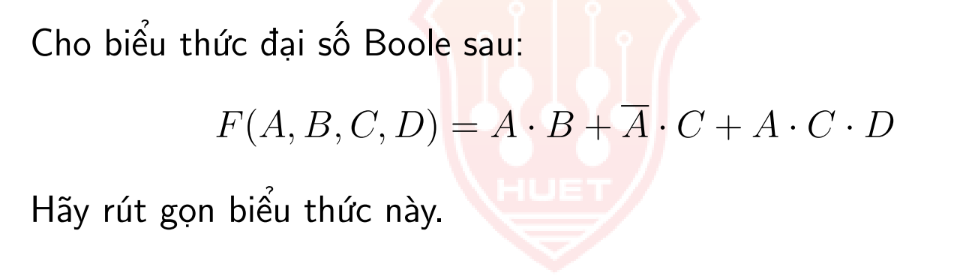

In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
# Tạo tập dữ liệu (tất cả các tổ hợp của A, B, C, D)
X = np.array([[int(b) for b in format(i, "04b")] for i in range(16)])
A, B, C, D = X[:, 0], X[:, 1], X[:, 2], X[:, 3]
Y = (A & B) | (~A & C) | (A & C & D)  # Hàm Boolean
Y = Y.astype(np.float32)  # Chuyển về kiểu float để dùng trong TensorFlow

In [48]:
# Xây dựng mô hình TensorFlow
def create_model():
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(4,)),  # 8 neuron ẩn
        layers.Dense(1, activation='sigmoid')  # Đầu ra nhị phân
    ])
    return model

In [49]:
# Chọn thuật toán tối ưu hóa (thay đổi ở đây để thử nghiệm GD, SGD, RMSProp, Adam)
optimizers = {
    "GD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    "SGD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSProp": keras.optimizers.RMSprop(learning_rate=0.01),
    "Adam": keras.optimizers.Adam(learning_rate=0.01)
}

# Lưu lịch sử huấn luyện
histories = {}

In [50]:
# Chạy với từng optimizer
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    model = create_model()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X, Y, epochs=500, verbose=0, batch_size=16, validation_split=0.2)
    histories[name] = history.history
    loss, acc = model.evaluate(X, Y, verbose=0)
    print(f"Final Accuracy with {name}: {acc:.4f}")


Training with GD optimizer:
Final Accuracy with GD: 0.8125

Training with SGD optimizer:
Final Accuracy with SGD: 0.8750

Training with RMSProp optimizer:
Final Accuracy with RMSProp: 0.8125

Training with Adam optimizer:
Final Accuracy with Adam: 0.8125


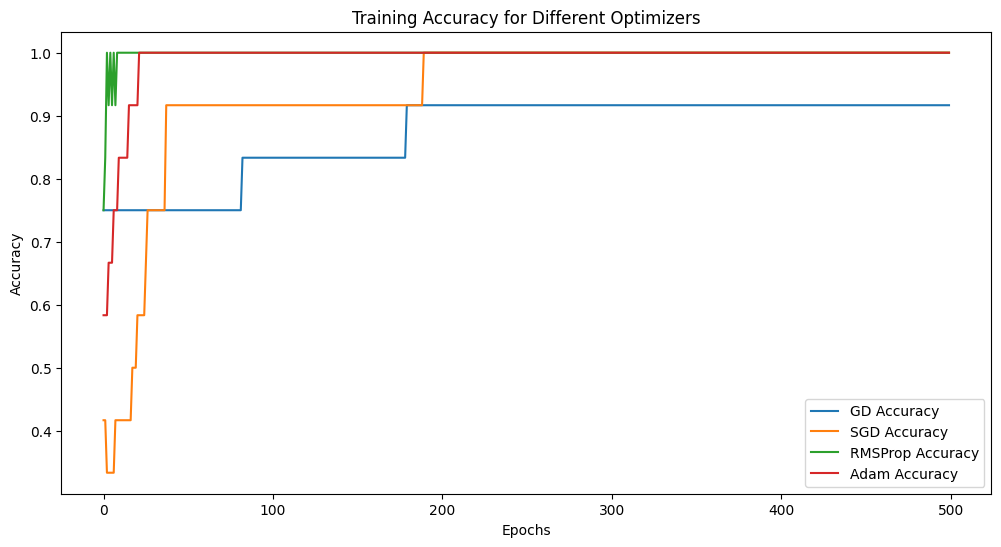

In [51]:
# Vẽ biểu đồ trực quan
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Optimizers')
plt.legend()
plt.show()

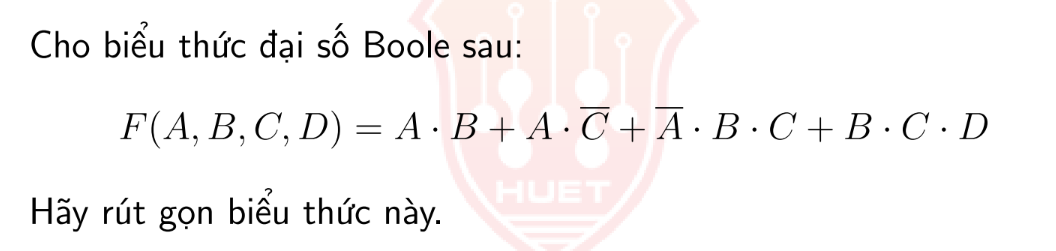

In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
# Tạo tập dữ liệu (tất cả các tổ hợp của A, B, C, D)
X = np.array([[int(b) for b in format(i, "04b")] for i in range(16)])
A, B, C, D = X[:, 0], X[:, 1], X[:, 2], X[:, 3]
Y = (A & B) | (A & ~C) | (~A & B & C) | (B & C & D)  # Biểu thức Boolean mới
Y = Y.astype(np.float32)  # Chuyển về kiểu float để dùng trong TensorFlow

In [54]:
# Xây dựng mô hình TensorFlow
def create_model():
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(4,)),  # 8 neuron ẩn
        layers.Dense(1, activation='sigmoid')  # Đầu ra nhị phân
    ])
    return model

In [55]:
# Chọn thuật toán tối ưu hóa (thay đổi ở đây để thử nghiệm GD, SGD, RMSProp, Adam)
optimizers = {
    "GD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    "SGD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSProp": keras.optimizers.RMSprop(learning_rate=0.01),
    "Adam": keras.optimizers.Adam(learning_rate=0.01)
}

# Lưu lịch sử huấn luyện
histories = {}

In [56]:
# Chạy với từng optimizer
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    model = create_model()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X, Y, epochs=500, verbose=0, batch_size=16, validation_split=0.2)
    histories[name] = history.history
    loss, acc = model.evaluate(X, Y, verbose=0)
    print(f"Final Accuracy with {name}: {acc:.4f}")


Training with GD optimizer:
Final Accuracy with GD: 0.5000

Training with SGD optimizer:
Final Accuracy with SGD: 1.0000

Training with RMSProp optimizer:
Final Accuracy with RMSProp: 1.0000

Training with Adam optimizer:
Final Accuracy with Adam: 1.0000


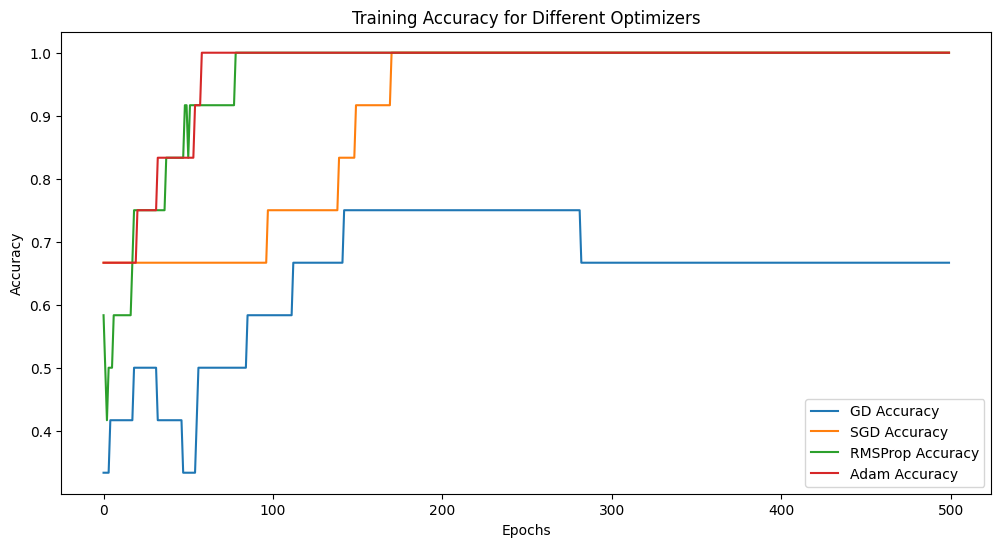

In [57]:
# Vẽ biểu đồ trực quan
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Optimizers')
plt.legend()
plt.show()


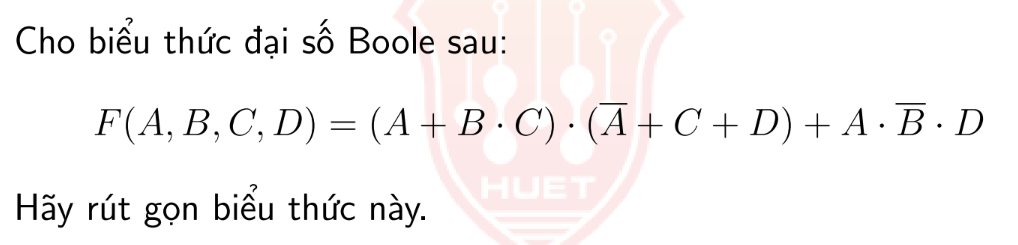

In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
# Tạo tập dữ liệu (tất cả các tổ hợp của A, B, C, D)
X = np.array([[int(b) for b in format(i, "04b")] for i in range(16)])
A, B, C, D = X[:, 0], X[:, 1], X[:, 2], X[:, 3]
Y = ((A | (B & C)) & (~A | C | D)) | (A & ~B & D)  # Biểu thức Boolean mới
Y = Y.astype(np.float32)  # Chuyển về kiểu float để dùng trong TensorFlow

In [60]:
# Xây dựng mô hình TensorFlow
def create_model():
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(4,)),  # 8 neuron ẩn
        layers.Dense(1, activation='sigmoid')  # Đầu ra nhị phân
    ])
    return model

In [61]:
# Chọn thuật toán tối ưu hóa (thay đổi ở đây để thử nghiệm GD, SGD, RMSProp, Adam)
optimizers = {
    "GD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    "SGD": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSProp": keras.optimizers.RMSprop(learning_rate=0.01),
    "Adam": keras.optimizers.Adam(learning_rate=0.01)
}

# Lưu lịch sử huấn luyện
histories = {}

In [62]:
# Chạy với từng optimizer
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    model = create_model()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X, Y, epochs=500, verbose=0, batch_size=16, validation_split=0.2)
    histories[name] = history.history
    loss, acc = model.evaluate(X, Y, verbose=0)
    print(f"Final Accuracy with {name}: {acc:.4f}")


Training with GD optimizer:
Final Accuracy with GD: 0.8750

Training with SGD optimizer:
Final Accuracy with SGD: 0.9375

Training with RMSProp optimizer:
Final Accuracy with RMSProp: 1.0000

Training with Adam optimizer:
Final Accuracy with Adam: 0.9375


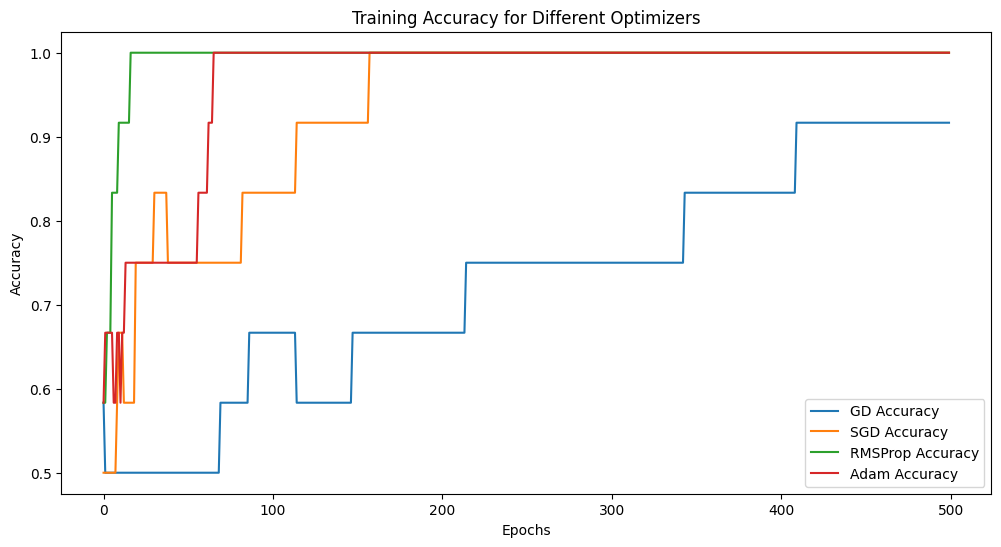

In [64]:
# Vẽ biểu đồ trực quan
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Different Optimizers')
plt.legend()
plt.show()